# Working with Image in Python

## Pengantar

**Apakah itu Image?**

Gambar pada dasarnya adalah matriks nilai piksel. Setiap piksel mewakili warna, dan intensitas warna tersebut ditentukan oleh nilainya. Umumnya, gambar direpresentasikan dalam 3 channel warna: Merah, Hijau, dan Biru (RGB). Bayangkan saja seperti "microsoft excel" yang memiliki baris dan kolom, gambar juga memiliki baris dan kolom, namun dalam kasus ini, setiap sel memiliki nilai yang mewakili warna.

**Mari coba membuat gambar grayscale dengan Numpy**

### Menginstall Library

> Tidak perlu jalankan kode di bawah ini jika anda telah menginstall library tersebut
> Sangat disarankan untuk menggunakan environment baru dan menginstall library melalui terminal dengan cara

*(jalankan satu per-satu)*

```bash
conda create -n py310_imgprocessing python=3.10
conda activate py310_imgprocessing
pip install numpy~=1.21 matplotlib opencv-python
```

In [ ]:
!pip install numpy~=1.21 matplotlib opencv-python

### Mengimport Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

**Penjelasan:**
- `numpy` adalah library yang digunakan untuk operasi matriks
- `matplotlib` adalah library yang digunakan untuk plotting
- `cv2` adalah library `opencv` yang digunakan untuk membaca, menulis, dan memproses gambar
- `os` adalah library yang digunakan untuk berinteraksi dengan sistem operasi

### Membuat Matrix Numpy

Kita akan membuat gambar 1 channel dengan ukuran 5x5. Kita akan membuat pola tanda '+' dengan nilai 255 (putih) dan 0 (hitam) pada matriks tersebut.

In [11]:
numpy_img_1ch = np.array([[0, 0, 255, 0, 0],
                            [0, 0, 255, 0, 0],
                            [255, 255, 255, 255, 255],
                            [0, 0, 255, 0, 0],
                            [0, 0, 255, 0, 0]], dtype=np.uint8)

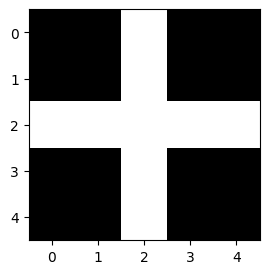

In [12]:
plt.figure(figsize=(3, 3))
plt.imshow(numpy_img_1ch, cmap='gray')
plt.show()

**Pertanyaan analisa:**
- Mengapa kita perlu menuliskan `cmap='gray'` pada `imshow`?
- Apa maksud dari `dtype=np.uint8`?
- Bagaimana jika kita mau membuat tanda '+' berwarna abu-abu?

## Memuat Gambar dari File

Kita akan memuat dua buah gambar yang telah saya sediakan. Gambar tersebut digenerate menggunakan model GROX dari X.com dan Adobe Firefly dengan sedikit modifikasi.

Pertama-tama kita akan menentukan dimana letak gambar tersebut. Kita akan menggunakan `os.path.join` untuk menggabungkan path dari folder dan nama file.

*Mengapa menggunakan `os.path.join` lebih baik ketimbang langsung menuliskan path secara manual?*
- Karena `os.path.join` akan menyesuaikan path sesuai dengan sistem operasi yang digunakan.
- Akan terjadi masalah apabila kita menggunakan path secara manual pada sistem operasi yang berbeda. Misalnya, tanda pemisah path pada Windows adalah `\` sedangkan pada Linux adalah `/`.

In [15]:
path_gambar1 = os.path.join(os.getcwd(), 'data', 'sample-a-img-if4021.jpg')
path_gambar2 = os.path.join(os.getcwd(), 'data', 'sample-b-img-if4021.jpg')

# mengecek apakah file gambar ada
# jika tidak ada, akan tercetak pesan "File tidak ditemukan: <path>"
if not os.path.exists(path_gambar1):
    print('File tidak ditemukan:', path_gambar1)
    exit()

Selanjutnya kita akan memuat gambar tersebut menggunakan `cv2.imread`. Penting untuk diperhatikan, format urutan channel jika menggunakan `cv2.imread` adalah BGR, bukan RGB.

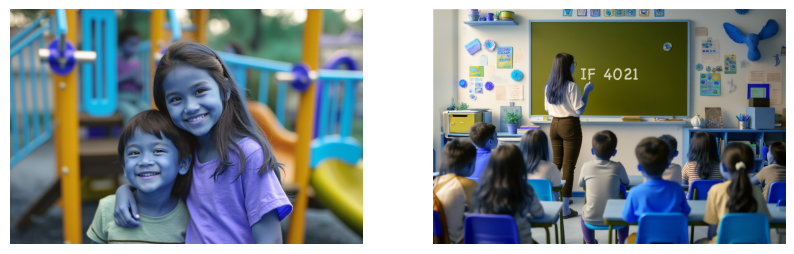

In [20]:
img1 = cv2.imread(path_gambar1)
img2 = cv2.imread(path_gambar2)

ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].imshow(img1)
fig[1].imshow(img2)
fig[0].axis('off')
fig[1].axis('off')
plt.show()

**Penjelasan:**
- Kita menggunakan `ax, fig = plt.subplots(1, 2)` untuk membuat 2 plot sejajar. Ini akan mempermudah dan membuat lebih rapi ketimbang menggunakan 2 plot terpisah. Rumusnya adalah

```python
fig, ax = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(lebar, tinggi))
```

- Dapat kita amati bahwa warna pada gambar tidak sesuai dengan aslinya. Hal ini dikarenakan format channel yang digunakan oleh `cv2.imread` adalah BGR, bukan RGB. Sementara `imshow` menggunakan format RGB.
- `fig[0].axis('off')` dan `fig[1].axis('off')` digunakan untuk menghilangkan sumbu pada plot.

**Mari kita perbaiki urutan channel pada gambar tersebut!**

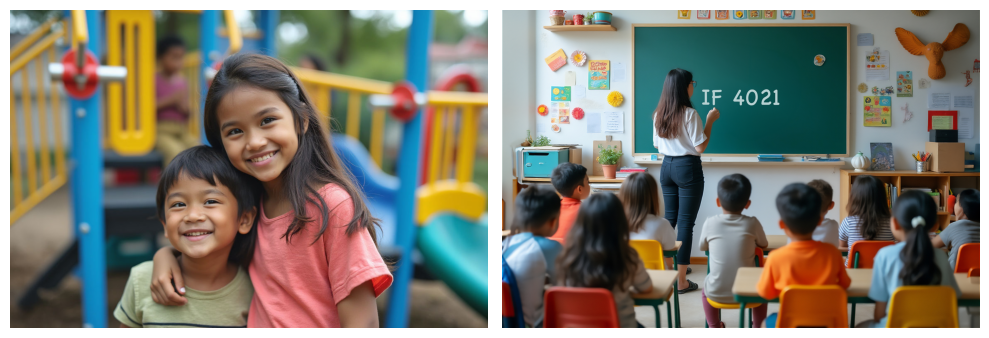

In [21]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Mengubah warna gambar dari BGR ke RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # Mengubah warna gambar dari BGR ke RGB

ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].imshow(img1)
fig[1].imshow(img2)
fig[0].axis('off')
fig[1].axis('off')
plt.tight_layout() # untuk mengatur jarak antar gambar agar lebih rapi
plt.show()

## Bermain dengan Pixel Value

Gambar tersebut tersusun atas nilai-nilai RGB sepanjang baris dan kolom. Nilai RGB tersebut memiliki rentang 0-255.

**Mengapa 0-255?**
- Karena kita bekerja dengan gambar 8-bit. Artinya, setiap channel memiliki 8-bit, sehingga rentang nilai yang mungkin adalah 0-255.
- 8 bit berarti warna hitam adalah `00000000` dan warna putih adalah `11111111` atau 0-255 dalam desimal.

Mari melihat isi dari pixel value tersebut. Pertama-tama kita mau mengecek `shape` dari gambar tersebut. `shape` adalah atribut dari numpy array yang menunjukkan dimensi dari array tersebut.

In [22]:
print(f"Shape dari img1: {img1.shape}")

Shape dari img1: (768, 1152, 3)


Urutan `shape` adalah `(baris, kolom, channel)`. Mari coba kita lihat isi dari pixel value tersebut untuk masing-masing channel R, G, dan B pada 5 baris pertama dan 5 kolom pertama.

In [26]:
row5_column5_img1 = img1[0:5, 0:5]
print(f"Isi dari row5_column5_img1:\n{row5_column5_img1}")

Isi dari row5_column5_img1:
[[[131 139 142]
  [118 133 138]
  [104 132 135]
  [ 95 130 134]
  [ 88 126 129]]

 [[124 134 136]
  [111 129 133]
  [102 130 133]
  [ 95 130 134]
  [ 88 126 129]]

 [[116 132 132]
  [108 128 129]
  [102 130 133]
  [ 97 131 133]
  [ 91 126 128]]

 [[116 136 135]
  [107 131 131]
  [103 133 135]
  [101 132 135]
  [ 94 128 130]]

 [[116 143 138]
  [107 136 132]
  [103 133 133]
  [100 131 133]
  [ 93 124 126]]]


Supaya anda semakin jelas, kita akan mengubah seluruh nilai pixel tersebut (5 row pertama, dan 5 column pertama) menjadi 0 pada channel G dan B. Dengan demikian, gambar tersebut akan menjadi merah.

In [27]:
img1[0:5, 0:5] = [255, 0, 0] # pada area 5x5 pixel pertama, ubah channel kedua (G) dan ketiga (R) menjadi 0

mari kita lihat hasilnya!

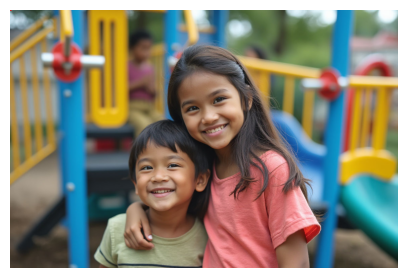

In [29]:
plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.axis('off')
plt.show()

tampaknya terlalu kecil untuk dilihat. Mari kita perbesar daerah yang kita ubah tadi menjadi 300 row pertama dan 300 column pertama.

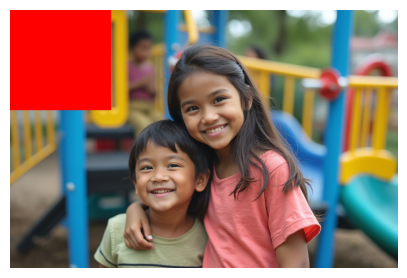

In [30]:
img1[0:300, 0:300] = [255, 0, 0] # pada area 300x300 pixel pertama, ubah channel kedua (G) dan ketiga (R) menjadi 0
plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.axis('off')
plt.show()

**Pertanyaan Analisa:**
- Dapatkah anda membuat kotak warna biru di bagian tengah dari gambar 2?
    - Anda dapat menghitung dimensi dari gambar tersebut dengan cara `img.shape`, lalu menghitung nilai tengahnya untuk membantu anda membuat kotak tersebut.

> Pertanyaan analisa adalah pertanyaan yang tidak dinilai. Namun jika anda memang ingin sungguh-sungguh belajar, sangat disarankan untuk mencoba menjawabnya. "Challange yourself!"

## Konversi Gambar

Sekarang, kita akan mencoba mengkonversi gambar tersebut menjadi grayscale. Grayscale adalah gambar yang hanya memiliki 1 channel. Kita akan menggunakan method `cv2.cvtColor` untuk mengkonversi gambar tersebut.

In [61]:
# memuat ulang gambar 1 dan gambar 2
img1 = cv2.imread(path_gambar1) # ingat, gambar yang dimuat masih dalam format BGR
img2 = cv2.imread(path_gambar2)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

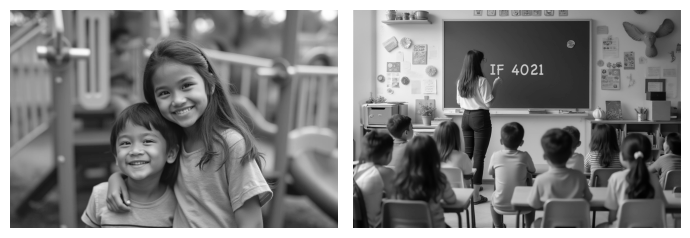

In [62]:
ax, fig = plt.subplots(1, 2, figsize=(7, 3))
fig[0].imshow(img1_gray, cmap='gray')
fig[1].imshow(img2_gray, cmap='gray')
fig[0].axis('off')
fig[1].axis('off')
plt.tight_layout()
plt.show()

**Pertanyaan Analisa:**
- Dapatkah anda membuat hanya bagian dari tengah gambar sebesar 250x250 menjadi grayscale?

## Menampilkan Histogram

Histogram adalah grafik yang menunjukkan distribusi intensitas warna pada gambar. Histogram sangat berguna untuk mengetahui distribusi warna pada gambar. Kita akan menggunakan `cv2.calcHist` untuk menghitung histogram dari gambar tersebut.

**Jangan lupa, image yang kita load belum diubah ke RGB**

In [63]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [64]:
histo_img1_red = cv2.calcHist([img1], [0], None, [256], [0, 256])
histo_img1_green = cv2.calcHist([img1], [1], None, [256], [0, 256])
histo_img1_blue = cv2.calcHist([img1], [2], None, [256], [0, 256])

method `cv2.calcHist` memiliki parameter-parameter sebagai berikut:

```python
cv2.calcHist(images, channels, mask, histSize, ranges)
```

dimana:
- `images` adalah gambar yang akan dihitung histogramnya
- `channels` adalah channel yang akan dihitung histogramnya
- `mask` adalah mask yang akan digunakan. Jika `None`, maka akan menghitung seluruh gambar
- `histSize` adalah jumlah bin yang akan digunakan. Maksudnya adalah, histogram akan dibagi menjadi beberapa bagian sesuai dengan jumlah bin tersebut.
- `ranges` adalah range nilai yang akan digunakan. Biasanya adalah `(0, 256)` untuk gambar 8-bit.

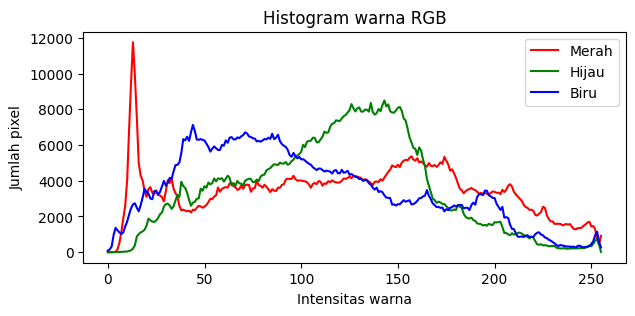

In [65]:
plt.figure(figsize=(7, 3))
plt.plot(histo_img1_red, color='red')
plt.plot(histo_img1_green, color='green')
plt.plot(histo_img1_blue, color='blue')
plt.title('Histogram warna RGB')
plt.xlabel('Intensitas warna')
plt.ylabel('Jumlah pixel')
plt.legend(['Merah', 'Hijau', 'Biru'])
plt.show()

**Cara Membaca / Menginterpretasi Histogram**
1. Histogram yang tinggi menunjukkan banyaknya piksel pada nilai tersebut.
2. Dalam kasus diatas, channel merah dengan intensitas warna rendah (0-50) memiliki piksel yang lebih banyak dibandingkan dengan channel biru dan hijau. Artinya:
    - Warna merah yang tampil di gambar cenderung lebih gelap.
3. Dalam istilah fotografi, intensitas warna ini dapat dikategorikan sebagai:
    - Black: Intensitas 0 - 50
    - Shadows: Intensitas 50 - 100
    - Midtones: Intensitas 100 - 150
    - Highlights: Intensitas 150 - 200
    - White: Intensitas 200 - 255

**Mari kita coba untuk menaikkan intensitas warna hanya pada channel merah.**

In [91]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli
img1_edit[:,:, 0] = img1[:,:, 0] * 1.2 # Naikkan intensitas warna merah sebesar 20%

**hitung kembali histogramnya!**

In [92]:
histo_img1_red_edit = cv2.calcHist([img1_edit], [0], None, [256], [0, 256])
histo_img1_green_edit = cv2.calcHist([img1_edit], [1], None, [256], [0, 256])
histo_img1_blue_edit = cv2.calcHist([img1_edit], [2], None, [256], [0, 256])

Mari kita lihat hasil gambarnya dan histogramnya!

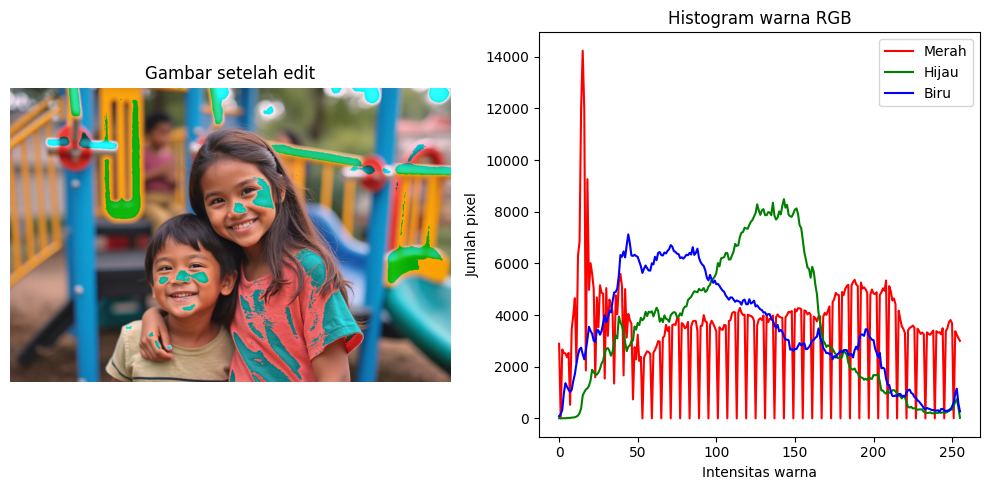

In [93]:
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].imshow(img1_edit)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit, color='red')
fig[1].plot(histo_img1_green_edit, color='green')
fig[1].plot(histo_img1_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

Jika kita melakukan perubahan pada intensitas pixel dengan cara mengalikan nilai pixel tersebut, maka terjadi ketidakseimbangan warna. Dapat kita lihat baju dan kuliat adik tersebut jadi terdapat warna-warna "cyan" dan "magenta" yang tidak ada sebelumnya.

**Lalu bagaimana cara mengatasi hal ini? Katakanlah kita mau menaikkan intensitas warna pada channel merah, namun tetap menjaga keseimbangan warna.**

## Menaikkan Intensitas Warna hanya pada Intensitas Rendah

In [97]:
img1_edit2 = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli

for row in range(img1_edit2.shape[0]):
    for col in range(img1_edit2.shape[1]):
        if img1_edit2[row, col, 0] < 100:
            img1_edit2[row, col, 0] = img1_edit2[row, col, 0] + 30

**Penjelesan:**
- Kita melakukan for-loop untuk row dan column pada gambar tersebut.

```python
for row in range(img1_edit2.shape[0]):
    for col in range(img1_edit2.shape[1]):
```

- Sehingga, variabel `row` akan berjalan dari 0 hingga jumlah baris gambar, dan variabel `col` akan berjalan dari 0 hingga jumlah kolom gambar.
- Untuk setiap `row` dan `col` kita akan cek apakah nilai pixel tersebut kurang dari 50 (intensitas warna merah yang berada pada bagian rendah).
- Jika iya, maka kita akan menaikkan intensitas warna tersebut dengan menambahkan dengan nilai tertentu

**hitung kembali histogramnya!**

In [98]:
histo_img1_red_edit2 = cv2.calcHist([img1_edit2], [0], None, [256], [0, 256])
histo_img1_green_edit2 = cv2.calcHist([img1_edit2], [1], None, [256], [0, 256])
histo_img1_blue_edit2 = cv2.calcHist([img1_edit2], [2], None, [256], [0, 256])

**Berikut adalah hasilnya!**

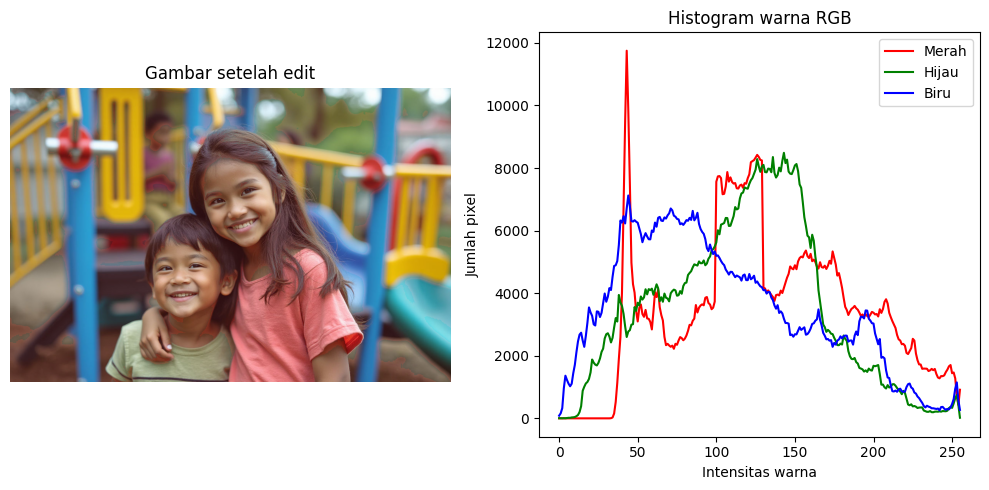

In [99]:
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].imshow(img1_edit2)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit2, color='red')
fig[1].plot(histo_img1_green_edit2, color='green')
fig[1].plot(histo_img1_blue_edit2, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

---

## Tugas: `ho2`

1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
- Lakukan resize untuk foto anda menjadi `1080` pada dimension terpanjangnya. Gunakan `cv2.resize` untuk melakukan resize.
- Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
- Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
- Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
- Tampilkanlah histogram dari foto tersebut
- Jelaskan hasil eksperimen anda

> Saya sudah mendapatkan akses ke server [MOSS Stanford](https://theory.stanford.edu/~aiken/moss/) untuk menggunakan sistem mereka dalam mata kuliah ini untuk mendeteksi code yang "plagiat". Untuk menjamin bahwa code anda tidak terindikasi plagiarisme, silahkan gunakan nama variabel / parameter / dan konfigurasi yang unik dan tidak copy paste. Dan yang terpenting, berusahalah bekerja sendiri. Jika mendapat bantuan baik dari manusia maupun AI / web, segera cantumkan dalam bagian terakhir `ipynb` anda.

### Ketentuan Penamaan File
```
nim_ho2.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho2>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan

